In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import files 
print(tf.__version__)




2.6.0


In [ ]:
!pip install -q pyyaml h5py 


In [ ]:
uoloaded=files.upload()

Saving eval_input.txt to eval_input.txt


In [ ]:
training_set = pd.read_csv('input.txt', delim_whitespace=True)

training_eval = pd.read_csv('eval_input.txt', delim_whitespace=True)

In [ ]:
print(training_set.head())

print(training_eval.head())

   rtt  tmp  targetedvscwnd  diff  average  output
1  0.0  0.0             0.0     0      0.0       0
2  0.0  0.0             0.0     0      0.0       0
3  0.0  0.0             0.0     0      0.0       0
4  0.0  0.0             0.0     0      0.0       0
5  0.0  0.0             0.0     0      0.0       0
   rtt  tmp  targetedvscwnd  diff  average  output
1  0.0  0.0             0.0     0      0.0       0
2  0.0  0.0             0.0     0      0.0       0
3  0.0  0.0             0.0     0      0.0       0
4  0.0  0.0             0.0     0      0.0       0
5  0.0  0.0             0.0     0      0.0       0


In [ ]:
column=training_set["diff"]
print(column.max())
print(column.min())
column=column/1759
print(column[100])

column1=training_eval["diff"]
print(column1.max())
print(column1.min())
column1=column1/1759
print(column1[100])

1759
0
0.014781125639567936
1561
0
0.014781125639567936


In [ ]:
training_set["diff"]=column
print(training_set)

training_eval["diff"]=column1
print(training_eval)

           rtt       tmp  targetedvscwnd      diff   average  output
1     0.000000  0.000000        0.000000  0.000000  0.000000       0
2     0.000000  0.000000        0.000000  0.000000  0.000000       0
3     0.000000  0.000000        0.000000  0.000000  0.000000       0
4     0.000000  0.000000        0.000000  0.000000  0.000000       0
5     0.000000  0.000000        0.000000  0.000000  0.000000       0
...        ...       ...             ...       ...       ...     ...
6897  0.022585  0.974333        0.974053  0.043206  0.022585       0
6898  0.022585  0.974333        0.974061  0.043206  0.022585       0
6899  0.022585  0.974333        0.974061  0.043206  0.022585       0
6900  0.022585  0.974333        0.974070  0.043206  0.022585       0
6901  0.022585  0.974333        0.974070  0.043206  0.022585       0

[6901 rows x 6 columns]
           rtt       tmp  targetedvscwnd      diff   average  output
1     0.000000  0.000000        0.000000  0.000000  0.000000       0
2     0.0

In [ ]:
training_output=training_set.pop("output")

training_eval_output=training_eval.pop("output")

In [ ]:
training_input=training_set

training_eval_input=training_eval

In [ ]:
print(training_output)
print(training_input)

print(training_eval_output)
print(training_eval_input)

1       0
2       0
3       0
4       0
5       0
       ..
6897    0
6898    0
6899    0
6900    0
6901    0
Name: output, Length: 6901, dtype: int64
           rtt       tmp  targetedvscwnd      diff   average
1     0.000000  0.000000        0.000000  0.000000  0.000000
2     0.000000  0.000000        0.000000  0.000000  0.000000
3     0.000000  0.000000        0.000000  0.000000  0.000000
4     0.000000  0.000000        0.000000  0.000000  0.000000
5     0.000000  0.000000        0.000000  0.000000  0.000000
...        ...       ...             ...       ...       ...
6897  0.022585  0.974333        0.974053  0.043206  0.022585
6898  0.022585  0.974333        0.974061  0.043206  0.022585
6899  0.022585  0.974333        0.974061  0.043206  0.022585
6900  0.022585  0.974333        0.974070  0.043206  0.022585
6901  0.022585  0.974333        0.974070  0.043206  0.022585

[6901 rows x 5 columns]
1       0
2       0
3       0
4       0
5       0
       ..
1487    0
1488    0
1489    0
14

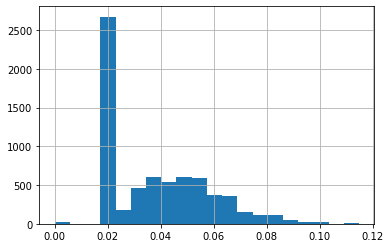

In [ ]:
training_input.rtt.hist(bins=20)


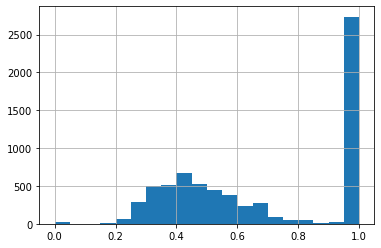

In [ ]:
training_input.tmp.hist(bins=20)


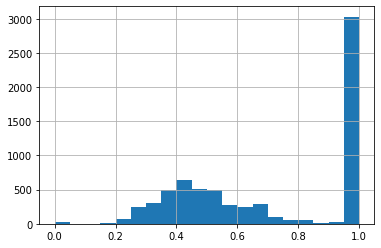

In [ ]:
training_input.targetedvscwnd.hist(bins=20)


In [ ]:
training_x=np.array(training_input)
training_y=np.array(training_output)


training_eval_x=np.array(training_eval_input)
training_eval_y=np.array(training_eval_output)

In [ ]:
print(training_x.shape)
print(training_y.shape)


print(training_eval_x.shape)
print(training_eval_y.shape

SyntaxError: ignored

In [ ]:
training_x=training_x.reshape(len(training_x),5,1)
training_y=training_y.reshape(len(training_y))

print(training_x.shape)
print(training_y.shape)


training_eval_x=training_eval_x.reshape(len(training_eval_x),5,1)
training_eval_y=training_eval_y.reshape(len(training_eval_y))

print(training_eval_x.shape)
print(training_eval_y.shape

In [ ]:
 model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(5, 1)),
      tf.keras.layers.Dense(20, activation='relu', kernel_initializer=keras.initializers.GlorotNormal()),
      keras.layers.Dropout(rate=0.2),
      tf.keras.layers.Dense(25, activation='relu',  kernel_initializer=keras.initializers.GlorotNormal()),
      keras.layers.Dropout(rate=0.2),
      tf.keras.layers.Dense(20, activation='relu',  kernel_initializer=keras.initializers.GlorotNormal()),
      keras.layers.Dropout(rate=0.2),
      tf.keras.layers.Dense(3,activation='softmax' ), 
  ])
 
 model.compile(
      loss='sparse_categorical_crossentropy',
      optimizer='adam',
      metrics='accuracy')

In [ ]:
model.fit(training_x,training_y,epochs=987)
          #,   callbacks=[callbacks])
model.save('DTCP')

Epoch 1/987
216/216 [==============================] - 0s 2ms/step - loss: 0.1470 - accuracy: 0.9493
Epoch 2/987
216/216 [==============================] - 0s 2ms/step - loss: 0.1290 - accuracy: 0.9604
Epoch 3/987
216/216 [==============================] - 0s 2ms/step - loss: 0.1155 - accuracy: 0.9609
Epoch 4/987
216/216 [==============================] - 1s 3ms/step - loss: 0.1099 - accuracy: 0.9654
Epoch 5/987
216/216 [==============================] - 1s 2ms/step - loss: 0.1031 - accuracy: 0.9683
Epoch 6/987
216/216 [==============================] - 0s 2ms/step - loss: 0.1011 - accuracy: 0.9678
Epoch 7/987
216/216 [==============================] - 0s 2ms/step - loss: 0.0885 - accuracy: 0.9736
Epoch 8/987
216/216 [==============================] - 0s 2ms/step - loss: 0.0887 - accuracy: 0.9738
Epoch 9/987
216/216 [==============================] - 0s 2ms/step - loss: 0.0833 - accuracy: 0.9730
Epoch 10/987
216/216 [==============================] - 0s 2ms/step - loss: 0.0764 - accura

In [ ]:
model.evaluate(training_eval_x,training_eval_y)


47/47 [==============================] - 0s 1ms/step - loss: 0.0195 - accuracy: 0.9946


[0.019548757001757622, 0.9946344494819641]

In [ ]:
model.layers[4].weights

[]

In [ ]:
print(model.trainable_variables) 

[<tf.Variable 'dense/kernel:0' shape=(5, 20) dtype=float32, numpy=
array([[ 1.2568754e+00,  3.2954230e+00, -2.1101822e-01, -1.8991193e+00,
         2.0779605e+00, -1.4748269e+00, -1.5639724e+00,  2.8569624e-01,
         3.0372572e+00, -1.2590669e+00,  1.8296706e-02,  2.4473085e-01,
        -3.1412533e-01,  2.4580088e+00, -3.6297286e-01, -1.3986223e+00,
        -1.2096174e+00, -1.4558980e+00, -1.6393703e+00, -5.1419002e-01],
       [-1.4407817e+00, -7.2510630e-01,  3.3513077e-02,  1.0197828e+00,
        -5.7455856e-01,  1.1235126e+00,  1.1690556e+00, -4.7079492e-01,
        -3.2550189e-01,  9.9263579e-01, -6.1484253e-01, -8.1711572e-01,
        -2.9480696e-01, -6.3636196e-01, -1.6822517e-01,  8.2638514e-01,
         1.1353626e+00,  1.6640463e-01,  7.3603541e-01, -2.3118262e-01],
       [-2.4223689e-02,  9.9394415e-03, -3.3568147e-01,  1.2735659e-02,
        -1.8980642e-01, -5.9371614e-03,  1.2968641e-02,  4.4121605e-01,
         1.2882789e-02, -6.8002697e-03, -3.9469221e-01, -1.6335398e

In [ ]:
x=np.array([0.0540525,	0.407113,	0.2552,	931	,0.0754249	])
x=x.reshape(1,5,1)
print(model.predict(x))
print(np.argmax(model.predict(x)))

[[0. 0. 1.]]
2
